In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from scipy.misc import imread
import matplotlib.patches as patches
from torch.utils.data import DataLoader
from torch.optim import SGD
import cv2
from pycrayon import CrayonClient
from torch.utils.data import DataLoader


def collate_fn(batch):
    return batch

In [5]:
import os
import torchvision.transforms as transforms
from faster_rcnn.utils.dataset import CocoData
dataDir = './data/mscoco'
dataType = 'train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)
pre_proposal_folder = './data/mscoco/coco_proposals/MCG/'

images_dir = os.path.join(dataDir,'images', dataType)
cap = CocoData(root = images_dir,
                        annFile = annFile,
                        pre_proposal_folder=pre_proposal_folder,
                        transform=transforms.ToTensor())
data_loader = DataLoader(dataset=cap, shuffle=True, collate_fn=collate_fn)

loading annotations into memory...
Done (t=13.32s)
creating index...
index created!


[[ 800.    600.      1.25]]


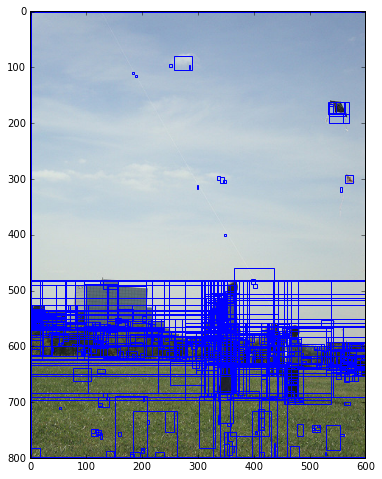

In [15]:
from scipy.misc import  imread, imresize


blobs = cap[13500]
im_data = blobs['data']
im_info = blobs['im_info']
gt_boxes = np.hstack([ blobs['boxes'] , blobs['gt_classes'][:, np.newaxis]])

rois = gt_boxes[gt_boxes[:, 4] == 0.]
gt = gt_boxes[gt_boxes[:, 4] != 0.]

base_path = './data/mscoco/images/train2014/'
img_path = os.path.join(base_path, blobs['im_name'])

print im_info
# Display the image
im_data = imread(img_path)
im_data = imresize(im_data, im_info[0, :2])

fig,ax = plt.subplots(1)
ax.imshow(im_data)

for i, box_data in enumerate(rois):
    box = box_data
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1]  ,linewidth=1,edgecolor='b',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    
# for i, box_data in enumerate(gt):
#     box = box_data
#     rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1]  ,linewidth=1,edgecolor='r',facecolor='none')
#     # Add the patch to the Axes
#     ax.add_patch(rect)


